In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer

In [14]:
torch.save(torch.Tensor(np.load('xxx.npy')), 'data/pt_coords.pt')
atom_type = ['C', 'H', 'H', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'C', 'H', 'H', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'H', 'H']
aa_type = ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
# Obtained by VMD "[atomselect top all] getbonds"
connections = [[4, 1, 2, 3], 0, 0, 0, [0, 6, 5], 4, [4, 8, 7], 6, [6, 14, 9, 10], 8, [8, 11, 12, 13], 10, 10, 10, [8, 16, 15], 14, [14, 18, 17], 16, [16, 19, 20, 21], 18, 18, 18]

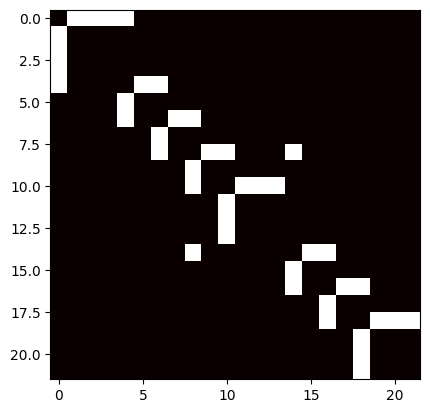

In [4]:
adj_matrix = torch.zeros((len(atom_type), len(atom_type)))
for position, atoms in enumerate(connections):
    if isinstance(atoms, list):
        for atom in atoms:
            adj_matrix[position][atom] = 1
    else:
        adj_matrix[position][atoms] = 1
plt.imshow(adj_matrix, cmap='hot')

In [7]:
def generate_adj_list(adj_matrix: torch.tensor):
    return adj_matrix.nonzero().long().t().contiguous()

adj_list = generate_adj_list(adj_matrix)

In [5]:
adj_list

tensor([[ 0,  0,  0,  0,  1,  2,  3,  4,  4,  4,  5,  6,  6,  6,  7,  8,  8,  8,
          8,  9, 10, 10, 10, 10, 11, 12, 13, 14, 14, 14, 15, 16, 16, 16, 17, 18,
         18, 18, 18, 19, 20, 21],
        [ 1,  2,  3,  4,  0,  0,  0,  0,  5,  6,  4,  4,  7,  8,  6,  6,  9, 10,
         14,  8,  8, 11, 12, 13, 10, 10, 10,  8, 15, 16, 14, 14, 17, 18, 16, 16,
         19, 20, 21, 18, 18, 18]])

In [ ]:
tokenizer = Tokenizer(BPE())
trainer = BpeTrainer()
tokenizer.train_from_iterator(atom_type, trainer=trainer)
tokenizer.save('tknzs/atom_tokenizer.json')
atom_ids = tokenizer.encode(''.join(atom_type)).ids

In [26]:
tokenizer = Tokenizer(BPE())
trainer = BpeTrainer()
tokenizer.train_from_iterator(aa_type, trainer=trainer)
tokenizer.save('tknzs/aa_tokenizer.json')
aa_ids = tokenizer.encode(''.join(aa_type)).ids

In [22]:
torch.save(adj_list.type(torch.LongTensor), 'data/edge_index.pt')
torch.save(torch.tensor(aa_ids), 'data/aa_inputs.pt')
torch.save(torch.tensor(atom_ids), 'data/atom_inputs.pt')